## Loading the data

In [1]:
import utils as ut
import processing as p
import xupy as xp
from grasp import stats
from matplotlib.pyplot import *
import astropy.units as u

tn = '20250926_122421'
cal_psf = ut.load_psf(f"{ut.simpath}/observations/{tn}/calibration.fits")
cube = ut.load_psf_cube(tn)


[XuPy] Device 0 available - GPU : `NVIDIA GeForce RTX 5080 Laptop GPU`
       Memory = 15850.56 MB | Compute Capability = 12.0
       Using CuPy 13.6.0 for acceleration.


## Image Parameter Determination

Reduced Chi-Sqaured: $\chi^2_{red}$

In [49]:
chi_arr = []
phi_arr = []
exp = cal_psf.psf_2d
for i in range(len(cube)):
    psf_i = cube[i].psf_2d
    phi_i = cube[i].phi
    chi_i = p.reduced_chi_squared(psf_i, exp)
    chi_arr.append(chi_i)
    phi_arr.append(phi_i)

chiphi = xp.np.array(list(zip(chi_arr, phi_arr)))
chiphi = chiphi[xp.np.argsort(chiphi[:,1])]

In [50]:
hpid = np.where(chiphi[:,1] == 90.)[0][0]
opid = np.where(chiphi[:,1] == 180.)[0][0]

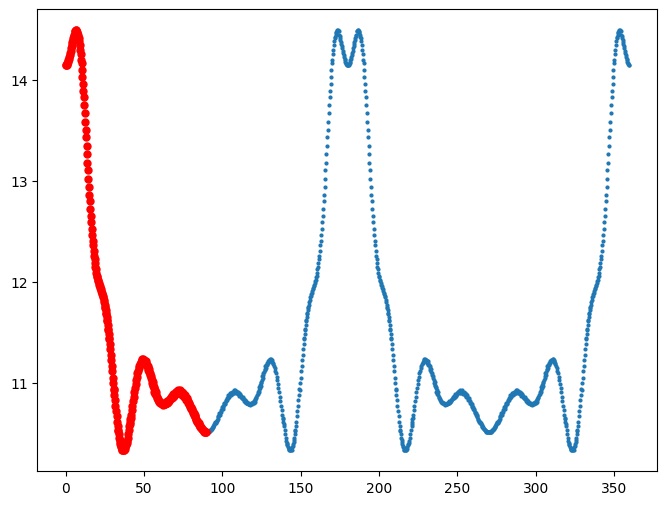

In [51]:
figure(1, figsize=(8,6))
plot(chiphi[:,1], chiphi[:,0], 'o', markersize=2)
plot(chiphi[:308,1], chiphi[:308,0], 'o', markersize=5, color='red')

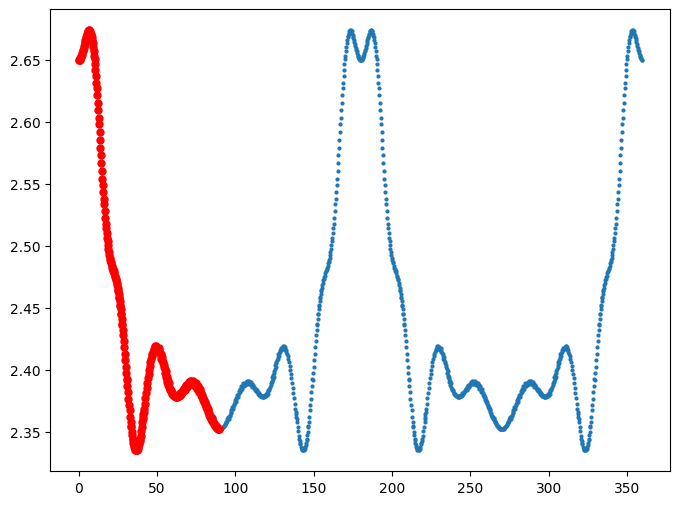

In [52]:
figure(1, figsize=(8,6))
plot(chiphi[:,1], np.log(chiphi[:,0]), 'o', markersize=2)
plot(chiphi[:308,1], np.log(chiphi[:308,0]), 'o', markersize=5, color='red')

Harmonic decomposition of the reduced Chi-squared:

$$ \ln{\chi^2(\varphi)_{red}} \simeq c_0 + c_2 \cos{2\varphi} + s_2 \sin{2\varphi} \quad ; \quad \text{k=2 term dominant for binaries}

In [64]:
def harmonic_decomposition(x, c0, c2, s2):
    x = x * u.deg.to(u.rad)
    return c0 + c2*xp.np.cos(2*x) + s2*xp.np.sin(2*x)

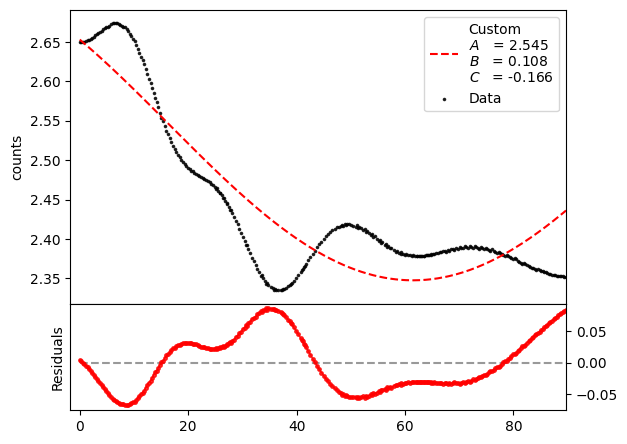

In [72]:
fit = stats.fit_data_points(data = np.log(chiphi[:hpid,0]), x_data = chiphi[:hpid,1], method = harmonic_decomposition, plot=True)

In [73]:
amplitude = xp.np.sqrt(fit.coeffs[1]**2 + fit.coeffs[2]**2)
print(f"Amplitude of the k=2 harmonic: {amplitude:.4f}")
phase = (xp.np.arctan2(fit.coeffs[2], fit.coeffs[1]) / 2) * u.rad.to('deg')
print(f"Phase of the k=2 harmonic: {phase:.2f} deg")

Amplitude of the k=2 harmonic: 0.1979
Phase of the k=2 harmonic: -28.52 deg
